<a href="https://colab.research.google.com/github/pranitha2144/CollegeInternship2020/blob/master/FinalTestLeaf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

FINAL RUN OF TESTING WITH ALREADY PRESENT WTS FILE

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
cd /content/gdrive/My Drive/Leaf_Disease_Identification/mask_rcnn_infection_detection

/content/gdrive/My Drive/Leaf_Disease_Identification/mask_rcnn_infection_detection


In [4]:
!pip3 install tensorflow==1.15

     |████████████████████████████████| 412.3MB 38kB/s 
     |████████████████████████████████| 3.8MB 44.6MB/s 
     |████████████████████████████████| 512kB 36.5MB/s 
     |████████████████████████████████| 51kB 6.3MB/s 
  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7542 sha256=dcdda87098698c9dab1899162b589825df3f2d38ba19aacea61f3d2438a247f3
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
ERROR: tensorflow-probability 0.11.0 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
  Found existing installation: tensorboard 2.3.0
    Uninstalling tensorboard-2.3.0:
      Successfully uninstalled tensorboard-2.3.0
  Found existing installation: tensorflow-estimator 2.3.0
    Uninstalling tensorflow-estimator-2.3.0:
      Successfully uninstalled tensorflow-estimator-2.3.0
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully 

In [5]:
!pip3 install keras==2.2.5

     |████████████████████████████████| 337kB 2.8MB/s 
  Found existing installation: Keras 2.4.3
    Uninstalling Keras-2.4.3:
      Successfully uninstalled Keras-2.4.3


In [6]:
import os
import cv2
import sys
import random
import math
import re
import time
import numpy as np
import tensorflow as tf
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import skimage
import glob

# Root directory of the project
ROOT_DIR = os.getcwd()

# Import Mask RCNN
sys.path.append(ROOT_DIR)  # To find local version of the library
from mrcnn import utils
from mrcnn import visualize
from mrcnn.visualize import display_images
import mrcnn.model as modellib
from mrcnn.model import log

import custom 

%matplotlib inline 

# Directory to save logs and trained model
MODEL_DIR = os.path.join(ROOT_DIR, "logs")

custom_WEIGHTS_PATH = "/content/gdrive/My Drive/logs/cedar_apple_rust20200716T0135/mask_rcnn_cedar_apple_rust_0005.h5"  # TODO: update this path

Using TensorFlow backend.


In [7]:
config = custom.CustomConfig()
custom_DIR = "customImages"

In [8]:
class InferenceConfig(config.__class__):
    # Run detection on one image at a time
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1

config = InferenceConfig()
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.9
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                14
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE                     [28, 28]
MAX_GT_INSTA

In [9]:
# Device to load the neural network on.
# Useful if you're training a model on the same 
# machine, in which case use CPU and leave the
# GPU for training.
DEVICE = "/cpu:0"  # /cpu:0 or /gpu:0

# Inspect the model in training or inference modes
# values: 'inference' or 'training'
# TODO: code for 'training' test mode not ready yet
TEST_MODE = "inference"

In [10]:
def get_ax(rows=1, cols=1, size=16):
    """Return a Matplotlib Axes array to be used in
    all visualizations in the notebook. Provide a
    central point to control graph sizes.
    
    Adjust the size attribute to control how big to render images
    """
    _, ax = plt.subplots(rows, cols, figsize=(size*cols, size*rows))
    return ax

In [11]:
# Load validation dataset
dataset = custom.CustomDataset()
dataset.load_custom(custom_DIR, "val")

# Must call before using the dataset
dataset.prepare()

print("Images: {}\nClasses: {}".format(len(dataset.image_ids), dataset.class_names))

Images: 30
Classes: ['BG', 'Cedar_apple_rust']


In [12]:
# Create model in inference mode
with tf.device(DEVICE):
    model = modellib.MaskRCNN(mode="inference", model_dir=MODEL_DIR,
                              config=config)








Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Instructions for updating:
box_ind is deprecated, use box_indices instead


Instructions for updating:
Use `tf.cast` instead.


In [13]:
print("Loading weights ", custom_WEIGHTS_PATH)
model.load_weights(custom_WEIGHTS_PATH, by_name=True)

Loading weights  /content/gdrive/My Drive/logs/cedar_apple_rust20200716T0135/mask_rcnn_cedar_apple_rust_0005.h5






Re-starting from epoch 5


In [14]:
from importlib import reload # was constantly changin the visualization, so I decided to reload it instead of notebook
reload(visualize)

<module 'mrcnn.visualize' from '/content/gdrive/My Drive/Leaf_Disease_Identification/mask_rcnn_infection_detection/mrcnn/visualize.py'>

5
image ID: Cedar_apple_rust.9f7d070e-f51d-4b14-86e4-6f059ea4eca7___FREC_C.Rust 0210.JPG (5) customImages/val/9f7d070e-f51d-4b14-86e4-6f059ea4eca7___FREC_C.Rust 0210.JPG
Processing 1 images
image                    shape: (1024, 1024, 3)       min:    0.00000  max:  182.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   58.30000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  int64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
gt_class_id              shape: (4,)                  min:    1.00000  max:    1.00000  int32
gt_bbox                  shape: (4, 4)                min:  424.00000  max:  760.00000  int32
gt_mask                  shape: (1024, 1024, 4)       min:    0.00000  max:    1.00000  bool


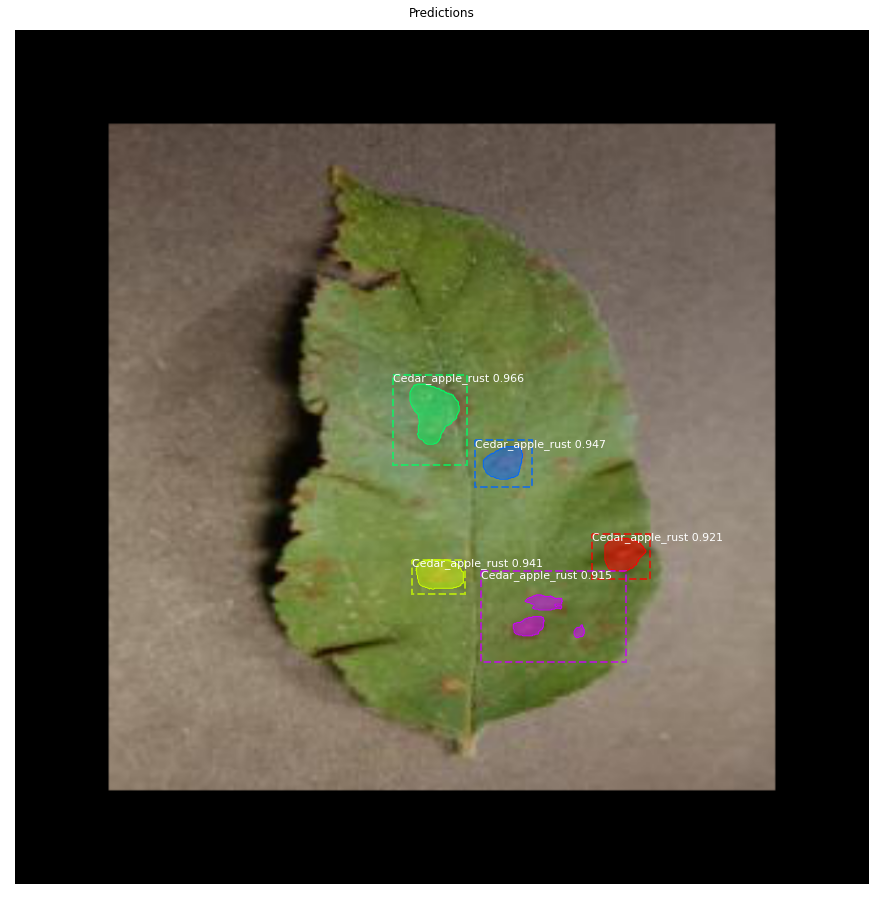

In [15]:
image_id = 5
print(image_id)
image, image_meta, gt_class_id, gt_bbox, gt_mask =\
    modellib.load_image_gt(dataset, config, image_id, use_mini_mask=False)
info = dataset.image_info[image_id]
print("image ID: {}.{} ({}) {}".format(info["source"], info["id"], image_id, 
                                       dataset.image_reference(image_id)))

# Run object detection
results = model.detect([image], verbose=1)

# Display results
ax = get_ax(1)
r = results[0]
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            dataset.class_names, r['scores'], ax=ax,
                            title="Predictions")
log("gt_class_id", gt_class_id)
log("gt_bbox", gt_bbox)
log("gt_mask", gt_mask)

Processing 1 images
image                    shape: (256, 256, 3)         min:    0.00000  max:  205.00000  uint8
molded_images            shape: (1, 1024, 1024, 3)    min: -123.70000  max:   86.20000  float64
image_metas              shape: (1, 14)               min:    0.00000  max: 1024.00000  float64
anchors                  shape: (1, 261888, 4)        min:   -0.35390  max:    1.29134  float32
[[[166 155 163]
  [166 155 163]
  [166 155 163]
  ...
  [126 115 123]
  [127 116 124]
  [128 117 125]]

 [[168 157 165]
  [168 157 165]
  [167 156 164]
  ...
  [123 112 120]
  [123 112 120]
  [122 111 119]]

 [[169 158 166]
  [169 158 166]
  [169 158 166]
  ...
  [121 110 118]
  [118 107 115]
  [116 105 113]]

 ...

 [[141 129 139]
  [135 123 133]
  [131 119 129]
  ...
  [100  87  96]
  [ 99  86  95]
  [101  88  97]]

 [[133 121 131]
  [129 117 127]
  [127 115 125]
  ...
  [101  88  97]
  [ 98  85  94]
  [ 97  84  93]]

 [[133 121 131]
  [132 120 130]
  [134 122 132]
  ...
  [100  87  96]
  

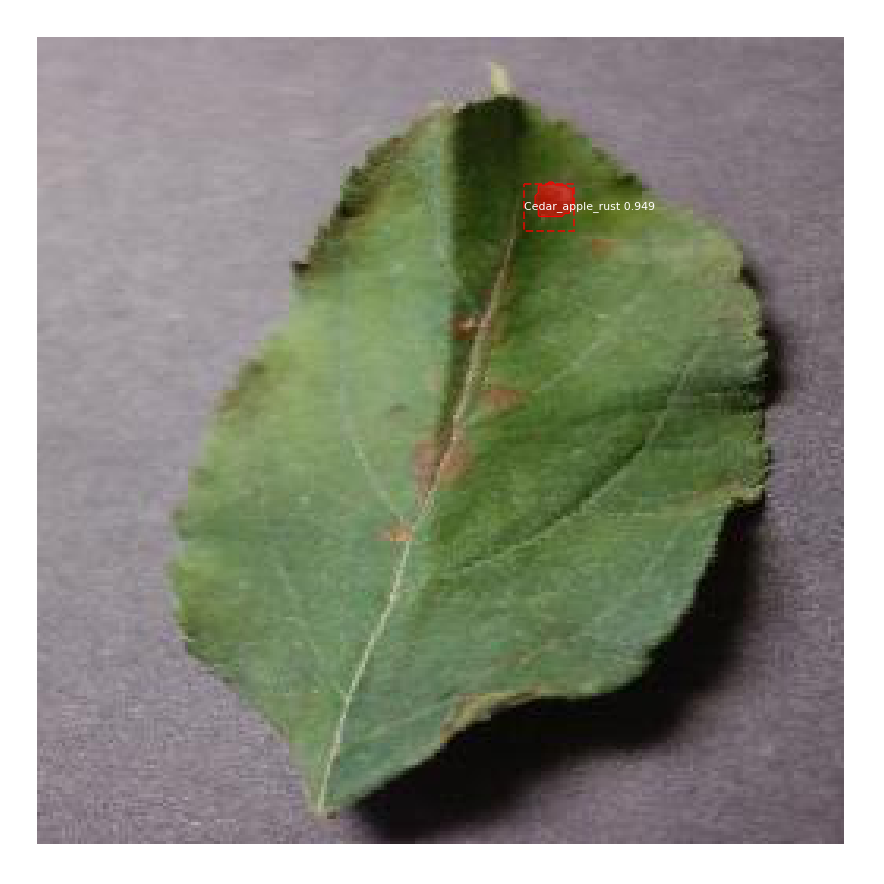

In [20]:
image = skimage.io.imread('/content/gdrive/My Drive/Leaf_Disease_Identification/mask_rcnn_infection_detection/customImages/val/9d03ec86-ab87-4193-8589-9cfeada9fe70___FREC_C.Rust 4442.JPG')
results = model.detect([image], verbose=1)

# Visualize results
r = results[0]
#visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'], 
                            #dataset.class_names, r['scores'], ax=ax,
                            #title="Predictions")
print(image)
visualize.display_instances(image, r['rois'], r['masks'], r['class_ids'],dataset.class_names, r['scores'])
